# Text Classification


# Naive Bayes Classifier

<div class="alert alert-success">
Implement your own naive bayes classifier and apply it to the 20newsgroups dataset.  
</div>
<ul>
    <li>Load the '20newsgroups' dataset</li>
    <li>Read the files and tokenize the text to obtain a "bag of words"</li>
    <li>Implement the naive bayes classifier (pseudocode is given below)</li>
    <li>Evaluate your classfier on the training/test set. Which accuracy can you achieve?</li>
</ul>


## Model

As the name suggests, in the Naive Bayes Classifier (NB) we make use of Bayes' theorem to build a classifier. We are going to use the NB to map text documents to class labels $c \in \mathcal{C} = \{1, 2, \dots, M\}$. Each text document is represented as a "bag of words" - a feature vector $\mathbf{x} = (x_1, \dots, x_p)$ that has as many entries as there are words in our vocabulary $\mathcal{V}$, p = $|\mathcal{V}|$. Each dimension $i$ in $\mathbf{x}$ is associated with one word in the vocabulary. A value $x_i = 1$ if the word associated with dimension $i$ occurs in the document, and $x_i = 0$ if the word does not occur in the document.

Before we can define the probabilistic model, we define the following random variables:
- $X_1, \dots, X_p$: the $p$ binary indicator random variables associated with attributes/words
- $C \in \{1, 2, \dots, M\}$: the random variable associated with the class of the document

Given a dataset of text documents and class labels, our goal is to estimate:

$$P[C | X_1, \dots, X_p]$$

Then we can classify documents by simply finding the class $c$ that maximizes this conditional probability:

$$h(\mathbf{x}) = \mathit{argmax}_{c \in \{1, 2, \dots, M\}} P[C=c | X_1=x_1, \dots, X_p=x_p]$$

We can't estimate this quantity directly from our dataset...

<div class="alert alert-warning">
Why?  
</div>

..., but by using Bayes theorem we can write:

$$P[C | X_1, \dots, X_p] = \frac{P[X_1, \dots, X_p | C] \cdot P[C]}{P[X_1, \dots, X_p]}$$

That's already helpful. We can estimate $P[C]$ by calculating the relative frequencies of classes over all documents (regardless of their content). However, the joint distribution $P[X_1, \dots, X_p | C]$ is a little annoying. Even for tiny vocabulary sizes ($\approx 100$) we would have to store and estimate $2^{100}$-1 parameters.  
The Naive Bayes Classifier is called "Naive" because it makes one very strong assumption about the observation variables $X_1, \dots, X_p$: All $X_i$ are conditionally independent given the class $C$:

$$P[X_1, \dots, X_p | C] \cdot P[C] =  P[C] \cdot  \prod_{i=1}^p P[X_i | C]$$

<div class="alert alert-info">
<b>Sanity Check:</b> Let's say we have documents from a newsgroup in which people discuss about politics. When we accept this independence assumption we acknowledge: Knowing that a document contains "Donald" does not alter our belief about whether this same document would also contain the word "Trump". $P[X_{'Trump'} = 1 | C = 2] = P[X_{'Trump'} = 1 | X_{'Donald'} = 1, C = 2]$. These independence assumptions will most likely be violated by any newsgroup. However, they lead to a very simple model and, in practice, the classifer yields very accurate predictions anyway.
</div>

Now the calculations are straight-forward. The terms $P[X_i | C]$ can be estimated by calculating the relative frequency of word $i$ per class $c$, resulting in a table of $p \cdot M$ conditional probabilities. And finally, we can make predictions by calculating:

[REDACTED]

NOTE: We completely ignored the denominator $P[X_1, \dots, X_p]$ in the maximization. 

<div class="alert alert-warning">
Why?  
</div>

This ignorance is justified by the fact that the denominator is a function of the data and the data is fixed. Since the data is fixed, the denominator is a constant. As we are only interested in the class $c$ that maximizes the above quantity, the constant denominator is irrelevant. It would be a different story if we were interested in the class probabilities, then certainly would we have to take $P[X_1, \dots, X_p]$ into account. Otherwise $P[C | \cdot]$ wouldn't be a proper pmf.



### Graphical model representing the joint distribution over $C, X_1, X_2, \dots, X_p$
<img src="nb-graph.png" height="200px" />

## Data Set
The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware / comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale / soc.religion.christian). Here is a list of the 20 newsgroups, partitioned (more or less) according to subject matter:




<table border=1>
<tr>
<td>comp.graphics<br>comp.os.ms-windows.misc<br>comp.sys.ibm.pc.hardware<br>comp.sys.mac.hardware<br>comp.windows.x</td>
<td>rec.autos<br>rec.motorcycles<br>rec.sport.baseball<br>rec.sport.hockey</td>
<td>sci.crypt<br>sci.electronics<br>sci.med<br>sci.space</td>
</tr><tr>
<td>misc.forsale</td>
<td>talk.politics.misc<br>talk.politics.guns<br>talk.politics.mideast</td>
<td>talk.religion.misc<br>alt.atheism<br>soc.religion.christian</td>
</tr>
</table>

## Naive Bayes Pseudocode
#### TrainMultinomialNB($\mathbb C$,$\mathbb D$)  
$V \leftarrow extractVocabulary(\mathbb D)$  
$N \leftarrow countDocs(\mathbb D)$    
for $c \in \mathbb C$:  
&nbsp;&nbsp;&nbsp;&nbsp;$N_c \leftarrow countDocsInClass(\mathbb D, c)$  
&nbsp;&nbsp;&nbsp;&nbsp;$prior[c] \leftarrow \frac{N_c}{N}$  
&nbsp;&nbsp;&nbsp;&nbsp;$text_c \leftarrow concatenateTextOfAllDocsInClass(\mathbb D, c)$   
&nbsp;&nbsp;&nbsp;&nbsp;for $t \in V$:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T_{ct} \leftarrow countOccurrencesOfTerm(text_c,t)$  
&nbsp;&nbsp;&nbsp;&nbsp;for $t \in V$:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$condprob[c][t] \leftarrow \frac{T_{ct} + 1}{\sum_{t'}(T_{ct'} + 1)}$  
return $V,prior,condprob$

#### ApplyMultinomialNB($\mathbb C,V,prior,condprob,d$)
$W \leftarrow extractTermsFromDoc(V,d)$   
for $c \in \mathbb C$:  
&nbsp;&nbsp;&nbsp;&nbsp;$score[c] \leftarrow log(prior[c])$  
&nbsp;&nbsp;&nbsp;&nbsp;for $t \in W$:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$score[c] += log(condprob[c][t])$  
return $argmax_{c \in \mathbb C} score[c]$

## Naive Bayes Helpers

In [10]:
%matplotlib inline

import os
import pprint
import re
import codecs
import math

import numpy as np
from matplotlib import pyplot as plt

### Simple file reading

In [11]:
with codecs.open('./newsgroups/20news-bydate-train/comp.graphics/37915', encoding='latin1') as file:
    pprint.pprint(file.readlines())

['From: kph2q@onyx.cs.Virginia.EDU (Kenneth Hinckley)\n',
 'Subject:   VOICE INPUT -- vendor information needed\n',
 'Reply-To: kph2q@onyx.cs.Virginia.EDU (Kenneth Hinckley)\n',
 'Organization: University of Virginia\n',
 'Lines: 27\n',
 '\n',
 '\n',
 'Hello,\n',
 '     I am looking to add voice input capability to a user interface I am\n',
 'developing on an HP730 (UNIX) workstation.  I would greatly appreciate \n',
 'information anyone would care to offer about voice input systems that are \n',
 'easily accessible from the UNIX environment. \n',
 '\n',
 '     The names or adresses of applicable vendors, as well as any \n',
 'experiences you have had with specific systems, would be very helpful.\n',
 '\n',
 '     Please respond via email; I will post a summary if there is \n',
 'sufficient interest.\n',
 '\n',
 '\n',
 'Thanks,\n',
 'Ken\n',
 '\n',
 '\n',
 "P.S.  I have found several impressive systems for IBM PC's, but I would \n",
 'like to avoid the hassle of purchasing and maintain

### Tokenize strings

In [12]:
def tokenize_str(doc):
    return re.findall(r'\b\w\w+\b', doc) # return all words with #characters > 1

def tokenize_file(doc_file):
    with codecs.open(doc_file, encoding='latin1') as doc:
        doc = doc.read().lower()
        _header, _blankline, body = doc.partition('\n\n')
        return tokenize_str(body) # return all words with #characters > 1
    
pprint.pprint(tokenize_file('./newsgroups/20news-bydate-train/comp.graphics/37915')[:30])

['hello',
 'am',
 'looking',
 'to',
 'add',
 'voice',
 'input',
 'capability',
 'to',
 'user',
 'interface',
 'am',
 'developing',
 'on',
 'an',
 'hp730',
 'unix',
 'workstation',
 'would',
 'greatly',
 'appreciate',
 'information',
 'anyone',
 'would',
 'care',
 'to',
 'offer',
 'about',
 'voice',
 'input']


### List content of directory

In [13]:
def getFileNames(path):
    return sorted([file_name for file_name in os.listdir(path)])

getFileNames("./newsgroups/20news-bydate-train/")

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Naive Bayes Implementation

<div class="alert alert-warning">
Fill in the missing code in "train_py()" and "_predict()"
</div>

In [14]:
import os
import re
import math
import codecs
from sklearn import metrics


class NaiveBayesClassifier:
    def __init__(self, min_count=1):
        self.min_count = min_count
        self.vocabulary = {}
        self.num_docs = 0
        self.classes = {}
        self.priors = {}
        self.conditionals = {}

    def _build_vocab(self, path):
        self.num_docs = 0
        for cn in os.listdir(path):
            if cn.startswith("."): #ignore hidden directory
                continue
            self.classes[cn] = {'doc_counts':0, 'term_counts':0, 'terms':{}}
            print(cn)
            cpath = os.path.join(path, cn)
            for dn in os.listdir(cpath):
                if dn.startswith("."):
                    continue
                terms = tokenize_file(os.path.join(cpath, dn))
                
                self.num_docs += 1
                self.classes[cn]['doc_counts'] += 1
                
                # build vocabulary and count terms
                for term in terms:
                    self.classes[cn]['term_counts'] += 1
                    if not term in self.vocabulary:
                        self.vocabulary[term] = 1
                        self.classes[cn]['terms'][term] = 1
                    else:
                        self.vocabulary[term] += 1
                        if not term in self.classes[cn]['terms']:
                            self.classes[cn]['terms'][term] = 1
                        else:
                            self.classes[cn]['terms'][term] += 1
        
        # remove terms with frequency < min_count
        self.vocabulary = {k:v for k,v in self.vocabulary.items() if v > self.min_count}

    def train_py(self, data_path):
        self._build_vocab(data_path)
        for cn in self.classes:
            
            # calculate priors
            self.priors[cn] = self.classes[cn]["doc_counts"] / self.num_docs
            #print("%.2f" % (100*self.priors[cn]), "%")
            
            # calculate conditionals
            self.conditionals[cn] = {}              
            for word in self.vocabulary:
                T_ct = 0
                if word in self.classes[cn]["terms"]:
                    T_ct += self.classes[cn]["terms"][word]
                    self.conditionals[cn][word] = (T_ct + 1) / (self.classes[cn]["term_counts"] + len(self.vocabulary))

    def test(self, data_path):
        true_y = []
        pred_y = []

        for c in self.classes:
            print(c)
            for f in os.listdir(os.path.join(test_path, c)):
                if f.startswith("."): # ignore hidden folders/files
                    continue
                doc_path = os.path.join(test_path, c, f)
                _, predicted_class = self._predict(doc_path)
                pred_y.append(predicted_class)
                true_y.append(c)
        return true_y, pred_y
                
    def _predict(self, doc_path):
        W = tokenize_file(doc_path)
        scores = {}
        for c in self.classes:
            # calculate p(c|word1, word2, ..., wordn)
            # store it as scores[c] = p(c | word1, word2, ..., wordn)
            scores[c] = math.log(self.priors[c])
            for word in W:
                if word in self.vocabulary:
                    scores[c] += math.log(self.conditionals[c][word])
            
        return scores, max(scores, key=scores.get)

In [15]:
train_path = "./newsgroups/20news-bydate-train/"
test_path = "./newsgroups/20news-bydate-test/"

In [16]:
clf = NaiveBayesClassifier()
clf.train_py(train_path)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


#### NaiveBayesClassifier()._buildVocab

The _buildVocab()_ method of NaiveBayesClassifier reads through all training documents and extracts all the relevant word counts.

You can access the term frequencies of all classes as shown below.

In [17]:
clf.num_docs # number of all documents
clf.vocabulary # dictionary of term:count
clf.classes['rec.autos']['doc_counts'] # number of documents in class rec.autos
clf.classes['rec.autos']['term_counts'] # number of words in class rec.autos
clf.classes['rec.autos']['terms'] # dictionary of term:count of class rec.autos

{'in': 2076,
 'article': 440,
 'c4vir5': 2,
 'l3r': 2,
 'shuksan': 4,
 'ds': 4,
 'boeing': 22,
 'com': 540,
 'fredd': 2,
 'fred': 12,
 'dickey': 2,
 'writes': 484,
 'carolinafan': 3,
 'uiuc': 68,
 'cka52397': 14,
 'uxa': 17,
 'cso': 38,
 'edu': 557,
 'wrote': 25,
 'have': 915,
 'been': 208,
 'active': 5,
 'defending': 4,
 'saturn': 72,
 'lately': 1,
 'on': 1059,
 'the': 5999,
 'net': 25,
 'and': 2285,
 'would': 435,
 'like': 326,
 'to': 2621,
 'state': 67,
 'my': 708,
 'full': 34,
 'opinion': 15,
 'subject': 31,
 'rather': 42,
 'than': 273,
 'just': 335,
 'reply': 16,
 'others': 37,
 'points': 11,
 'biggest': 8,
 'problem': 105,
 'some': 271,
 'people': 173,
 'seem': 33,
 'be': 705,
 'having': 29,
 'is': 1599,
 'that': 1446,
 'dealers': 27,
 'make': 134,
 '2k': 12,
 'car': 833,
 'think': 212,
 'most': 127,
 'will': 329,
 'agree': 34,
 'with': 718,
 'me': 384,
 'comparably': 2,
 'priced': 10,
 'its': 111,
 'competitors': 5,
 'they': 692,
 'aren': 43,
 'overpriced': 5,
 'compared': 10,
 

In [18]:
ty, py = clf.test(test_path)

alt.atheism


KeyError: '153'

In [ ]:
print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(ty, py)))

NameError: name 'ty' is not defined

### Plot confusion matrix 

In [ ]:
import itertools

#
# Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [ ]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(ty, py)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=clf.classes.keys(), title='Confusion matrix, without normalization')
plt.show()

NameError: name 'ty' is not defined

## Comparison to Sklearn's Implementation

In [ ]:
from sklearn.datasets import load_files
from sklearn import feature_extraction
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

twenty_train = load_files('./newsgroups/20news-bydate-train/', encoding='latin1')
twenty_test = load_files('./newsgroups/20news-bydate-test/', encoding='latin1')

In [ ]:
vectorizer = feature_extraction.text.CountVectorizer()#(max_features=len(clf.vocabulary))
train_X, train_y = vectorizer.fit_transform(twenty_train.data), twenty_train.target
test_X, test_y = vectorizer.transform(twenty_test.data), twenty_test.target
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(11314, 130107) (11314,) (7532, 130107) (7532,)


In [ ]:
clf = MultinomialNB()
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)

print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(test_y, pred_y)))

Accuracy: 77.28 %


Confusion matrix, without normalization


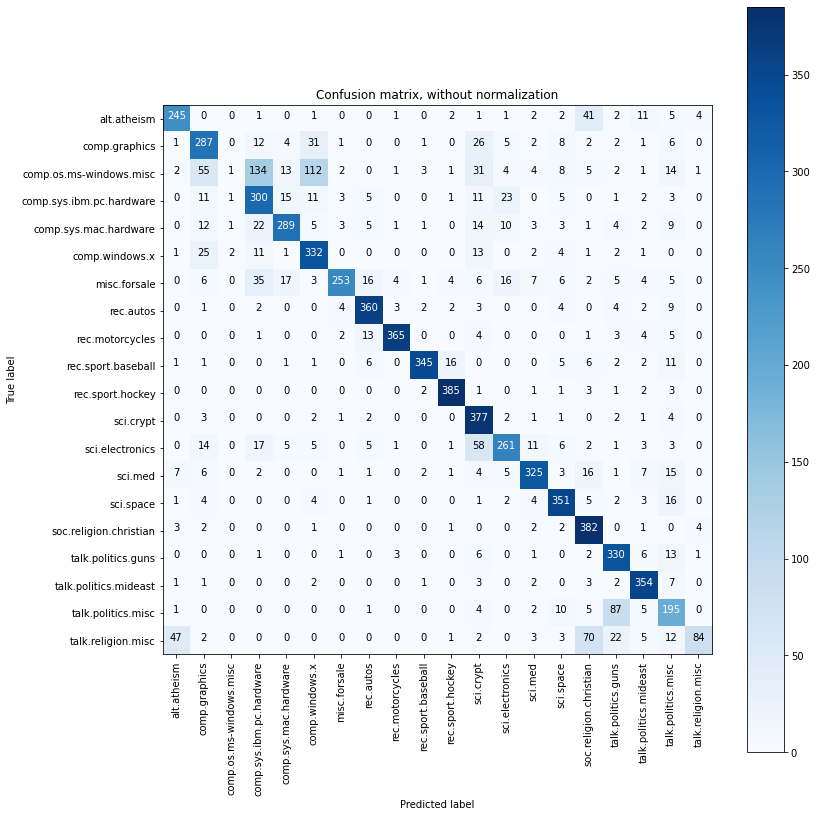

In [ ]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y, pred_y)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=twenty_test.target_names, title='Confusion matrix, without normalization')
plt.show()

### Appendix: Can we do better?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV


clf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1.0, 0.1),
             }

gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
gs_clf.fit(twenty_train.data, twenty_train.target)
pred = gs_clf.predict(twenty_test.data)

print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(twenty_test.target, pred)))

for param_name in sorted(parameters.keys()):
    print(param_name,":", gs_clf.best_params_[param_name])

Accuracy: 81.78 %
clf__alpha : 0.1
tfidf__use_idf : True
vect__ngram_range : (1, 2)


Confusion matrix, without normalization


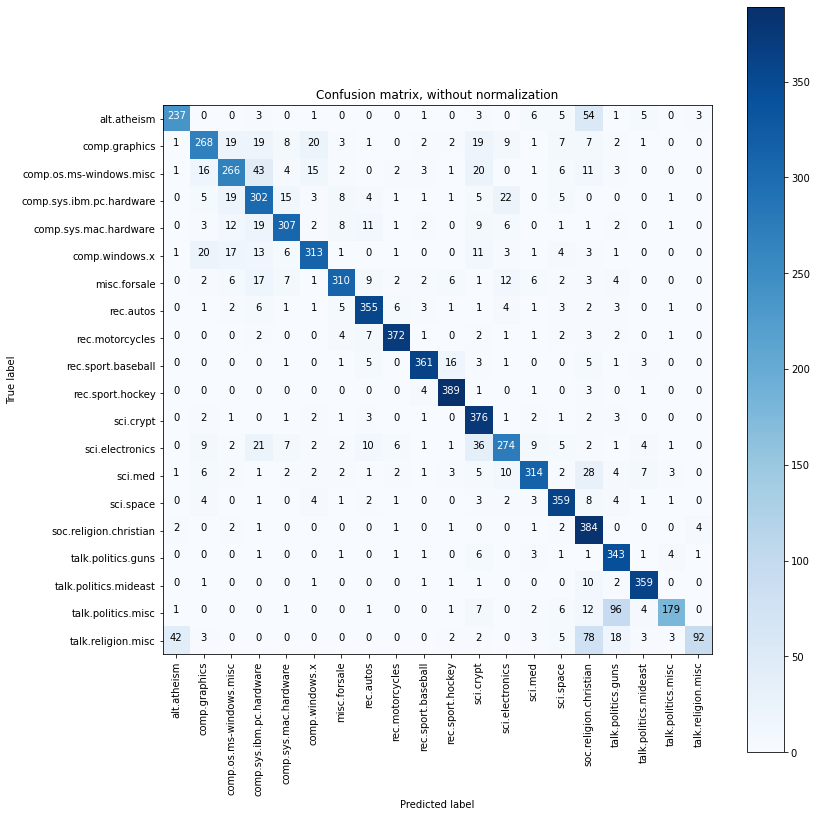

In [ ]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(twenty_test.target, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=twenty_test.target_names, title='Confusion matrix, without normalization')
plt.show()

further details can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html